# Task 5

In [2]:
import matplotlib.pyplot as plt
from time import time
# !pip install tqdm
from tqdm import tqdm
import numpy as np
from scipy import linalg as lg
from scipy.optimize import minimize
import scipy

## Task 5.1

In [12]:
def norm_vec_p(A, p):
    # np.seterr('raise')
    return (np.sum(A**p))**(1/p)

def norma_Lp(A, p, n=10000):
    norma = None
    for i in tqdm(range(n)):
        x = np.random.choice(np.linspace(0.001, 100, 100000), A.shape[1])
        x /= norm_vec_p(x, p)
        tmp = norm_vec_p(A@x, p)
        if i == 0:
            norma = tmp
        else:
            if tmp > norma: norma = tmp
    return norma

def chisl_obus(A, p):
    return norma_Lp(A, p)*norma_Lp(lg.inv(A), p)

In [5]:
from scipy import linalg

def Norma(A, type_='inf'):
    norma = None
    if type_ == 'inf':
        if len(A.shape) == 1:
            norma = A.max()
        else:
            # B = np.sum(np.abs(A), axis=1).max()
            # print(B)
            norma = np.sum(np.abs(A), axis=1).max()

    if type_ == 'L1':
        if len(A.shape) == 1:
            norma = np.sum(np.abs(A))
        else:
            norma = np.sum(np.abs(A.T), axis=1).max()

    if type_ == 'L2':
        if len(A.shape) == 1:
            norma = np.sqrt(np.sum(A**2))
        else:
            norma = np.sqrt(linalg.eigvals(A.T@A).max())
    
    return norma

def chisl_obus(A, type_ = 'inf'):
    if type_ == 'L1':
        return Norma(A, type_=type_)*Norma(np.linalg.inv(A), type_=type_)
    elif type_ == 'inf':
        return Norma(A.T, type_='L1')*Norma(np.linalg.inv(A.T), type_='L1')
    elif type_ == 'L2':
        l = scipy.linalg.eigvals(A@A.T)
        return np.sqrt(np.max(l)/np.min(l))
    else:
        return Norma(A, type_)*Norma(linalg.inv(A), type_)



# A = np.array([1, 2, 3])
# A = np.array([[1, 2, 3], [4,5,6]])
# A = np.random.random((4, 4))
# print(Norma(A, type_='inf'))
# print(Norma(A, type_='L1'))
# print(Norma(A, type_='L2'))
# print(chisl_obus(A, type_='inf'))
# print(chisl_obus(A, type_='L1'))
# print(chisl_obus(A, type_='L2'))

100%|██████████| 17/17 [01:18<00:00,  4.59s/it]


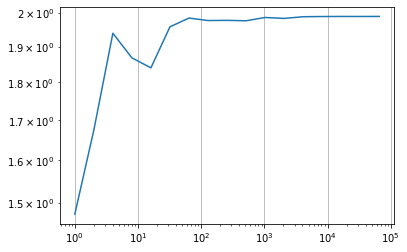

In [160]:
# A = np.array([[1, 2, 3]])
# A = np.arange(12).reshape((3,4))
A = np.random.rand(3, 4)
x = []
y = []
# mu = []
for i in tqdm(range(17)):
    j = 2**i
    x.append(j)
    y.append(norma_Lp(A, 3, n=j))

plt.plot(x, y)
plt.grid()
plt.xscale('log')
plt.yscale('log')
plt.show()

In [165]:
A = np.random.rand(3, 3)
norma_Lp(A, 3), chisl_obus(A, 3)

C:\Users\Xiaomi\AppData\Local\Temp\ipykernel_2204\2441253878.py:3: RuntimeWarning: invalid value encountered in double_scalars
  return (np.sum(A**p))**(1/p)


(1.3187199383771122, 5.732511954836884)

In [8]:
A = np.random.rand(3, 3)
norma_Lp(A, 2), Norma(A, type_='L2')

(1.5873519880209752, (1.5873966696202493+0j))

In [14]:
A = np.random.rand(3, 3)
norma_Lp(A, 100, n=10000), Norma(A, type_='inf')

100%|██████████| 10000/10000 [00:05<00:00, 1750.64it/s]


(1.3756389907705393, 1.3870818488339713)

## Task 5.2


In [64]:
def norma_frob(A):
    U, s, Vh = scipy.linalg.svd(A)
    return np.sqrt(np.sum(s**2))

def norma_L2(A):
    return np.sqrt(np.max(scipy.linalg.eigvals(A.T@A)))

100%|██████████| 1000/1000 [00:05<00:00, 171.64it/s]
C:\Users\Xiaomi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\numpy\core\_asarray.py:171: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


res: True


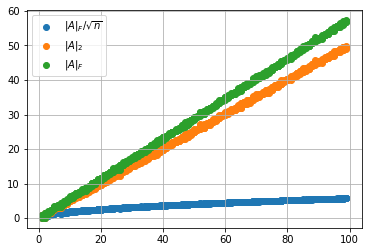

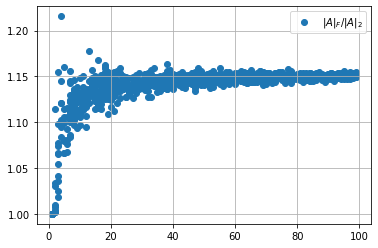

1.1498446928987593


In [69]:
flag = True
out = []
for i in tqdm(range(1000)):
    n = np.random.randint(1, 100)
    A = np.random.random((n, n))
    A2 = norma_L2(A)
    Af = norma_frob(A)
    if Af/np.sqrt(n) > A2:
        flag = False
    if Af < A2:
        flag = False
    out.append([n, Af/np.sqrt(n), A2, Af, Af/A2])
out = np.array(out)
print(f'res: {flag}')
plt.scatter(out[:, 0], out[:, 1], label='$|A|_F/\\sqrt{n}$')
plt.scatter(out[:, 0], out[:, 2], label='$|A|_2$')
plt.scatter(out[:, 0], out[:, 3], label='$|A|_F$')
plt.legend()
plt.grid()
plt.show()

plt.scatter(out[:, 0], out[:, 4], label='$|A|_F/|A|_2$')
plt.legend()
plt.grid()
plt.show()
print(np.real(out[out[:, 0]>60, 4].mean()))

In [72]:

out = []
for i in range(10000):
    n = np.random.randint(1, 10)
    A = np.random.random((n, n))
    A2 = norma_L2(A)
    Af = norma_frob(A)
    out.append(A2/Af)

out = np.array(out)
print(np.real(out.mean()), np.sqrt(out.var()))


0.9282273687951449 0.042922243068941844


## Task 5.3


In [96]:
def pol_opr(n):
    flag = True
    while flag:
        # A = np.random.randint(1, 100, (n,n))
        A = np.random.rand(n, n)
        A = A + A.T
        if np.all(scipy.linalg.eigvals(A) > 0):
            flag = False
    return A

def cholesky(A):
    L = np.zeros_like(A)
    L[0,0] = np.sqrt(A[0,0])
    L[1:,0] = A[1:,0]/L[0,0]
    # print('L:', L, lg.cholesky(A))
    for i in range(1, A.shape[0]):
        for j in range(1, i+1):
            if i == j:
                # print(i, A[i,i] - np.sum(L[i,:i]**2))
                L[i,i] = np.sqrt(A[i,i] - np.sum(L[i,:i]**2))
            else:
                L[i,j] = (A[i,j] - np.sum(L[i,:j]*L[j,:j]))/L[j,j]
    # print('----------------------')
    return L

def task3(cov):
    L = cholesky(cov)
    loc = np.random.rand(cov.shape[0])
    z = np.random.normal(loc, 1, cov.shape[0])
    return loc + L@z

A = pol_opr(3)
print('A:')
print(A)
print('True L:')
print(scipy.linalg.cholesky(A).T)
L = cholesky(A)
print('L:')
print(L)
print('L@L.T:')
print(L@L.T)
print(f'res: {np.sum(L@L.T - A)}')
print()
print('task3')
print(task3(A))

A:
[[1.26717971 0.8273541  1.01523512]
 [0.8273541  1.67042394 1.0760669 ]
 [1.01523512 1.0760669  1.93132888]]
True L:
[[1.12569077 0.         0.        ]
 [0.73497458 1.06312572 0.        ]
 [0.90187745 0.38867454 0.98329957]]
L:
[[1.12569077 0.         0.        ]
 [0.73497458 1.06312572 0.        ]
 [0.90187745 0.38867454 0.98329957]]
L@L.T:
[[1.26717971 0.8273541  1.01523512]
 [0.8273541  1.67042394 1.0760669 ]
 [1.01523512 1.0760669  1.93132888]]
res: 0.0

task3
[1.81922838 0.56474659 0.52060059]


## Task 5.4

In [16]:
def prokrust(X1, X2):
    x1 = np.mean(X1, axis=0).reshape(2, 1)
    # print(x1)
    x2 = np.mean(X2, axis=0).reshape(2, 1)
    X1_, X2_ = X1 - x1.T, X2 - x2.T
    U, s, Vh = scipy.linalg.svd(X1_.T@X2)
    R = U@Vh
    mu = x2 - R.T@x1
    print(mu)
    return X1@R + mu.T

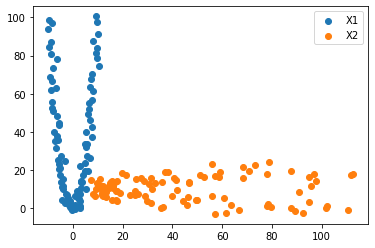

In [29]:
x1 = np.linspace(-10, 10, 100)
y1 = x1**2
X1 = np.concatenate(([x1], [y1]), axis=0).T
X2 = X1[:, [1,0]]+10+np.random.normal(0, 3, (100, 2))
X1 += np.random.normal(0, 1, (100, 2))
# print(X1, X2)
plt.scatter(X1[:, 0], X1[:, 1], label='X1')
plt.scatter(X2[:, 0], X2[:, 1], label='X2')
plt.legend()
plt.show()

[[-10.83306274]
 [ -9.72643887]]


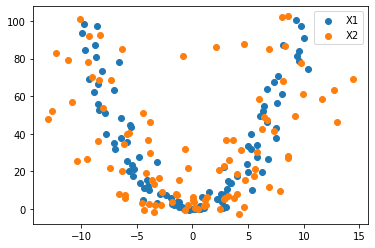

In [30]:
X2_ = prokrust(X2, X1)
plt.scatter(X1[:, 0], X1[:, 1], label='X1')
plt.scatter(X2_[:, 0], X2_[:, 1], label='X2')
plt.legend()
plt.show()

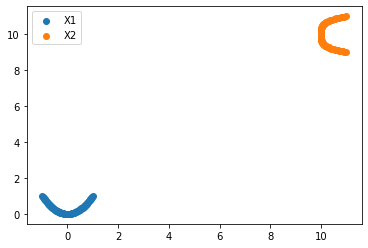

In [151]:
x1 = np.linspace(-1, 1, 100)
y1 = x1**2
X1 = np.concatenate(([x1], [y1]), axis=0).T
x2 = np.linspace(-1, 1, 100)
y2 = x2**4
X2 = np.concatenate(([y2], [x2]), axis=0).T+10
# print(X1, X2)
plt.scatter(X1[:, 0], X1[:, 1], label='X1')
plt.scatter(X2[:, 0], X2[:, 1], label='X2')
plt.legend()
plt.show()

[[-10.        ]
 [ -9.86806733]]


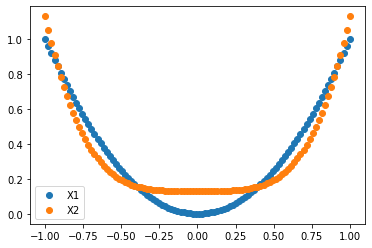

In [152]:
X2_ = prokrust(X2, X1)
plt.scatter(X1[:, 0], X1[:, 1], label='X1')
plt.scatter(X2_[:, 0], X2_[:, 1], label='X2')
plt.legend()
plt.show()